## Titanic Dataset

## Overview

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [920]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.feature_selection import chi2,SelectKBest,mutual_info_classif,RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import re
import string
from yellowbrick.model_selection import RFECV

In [1312]:
train_data = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\Own Assignments\Titanic Dataset\train.csv")
test_data =  pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\Own Assignments\Titanic Dataset\test.csv")

## Data Exploratory

In [828]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1263]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [830]:
def clean_data(train):
    train = re.sub('\[.*?\]','',train) 
    train = re.sub('[^0-9]','',train)
    
    return train
clean = lambda x: clean_data(x)

In [831]:
train_data['Ticket'] = train_data.Ticket.apply(clean)


In [832]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [833]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [834]:
#checking the number of columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [835]:
#checking for any null values 
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

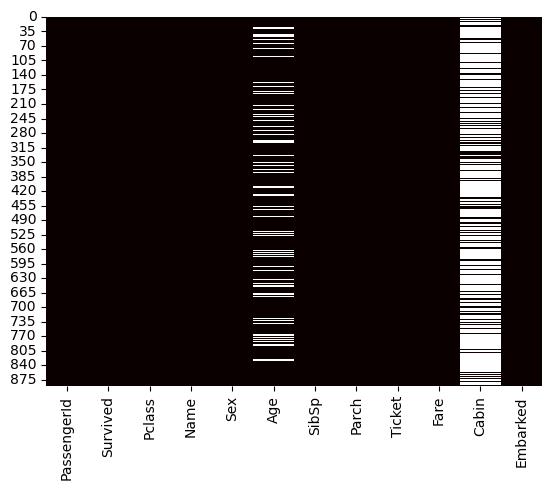

In [836]:
#plotting null values with heatmap 
sn.heatmap(train_data.isnull(),cbar=False,cmap= 'hot')

In [837]:
#checking for duplicated records
train_data[train_data.duplicated()] ## we have no duplicate records 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [838]:
#checking information of our features 
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Feature preprocessing


In [839]:
#mean imputation on age feature 
mean = train_data['Age'].mean()
print(mean)

29.69911764705882


In [840]:
#filling null values in age feature 
train_data2 = train_data
train_data2['Age'] = train_data2['Age'].fillna(mean)

In [841]:
#mode imputation on cabin feature 
mode2 = train_data2['Cabin'].mode().iloc[0]
print(mode2)

B96 B98


In [842]:
#filling our null values on mode with Cabin feature 
train_data2['Cabin']= train_data2['Cabin'].fillna(mode2)

In [843]:
train_data2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [844]:
def clean_data(train):
    train = re.sub('\[.*?\]','',train) 
    train = re.sub('[^a-zA-z]','',train)
    
    return train
clean3 = lambda x: clean_data(x)

In [845]:
train_data2['Cabin'] = train_data2.Cabin.apply(clean3)


In [846]:
train_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,521171,7.2500,BB,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,23101282,7.9250,BB,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,BB,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,BB,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,6607,23.4500,BB,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [847]:
train_data2.Cabin.describe()

count     891
unique     16
top        BB
freq      694
Name: Cabin, dtype: object

In [848]:
train_data2.Cabin.value_counts()

BB      694
C        51
B        36
E        32
D        32
A        15
F         9
G         4
CCC       4
CC        4
FG        3
BBBB      2
BBB       2
DD        1
FE        1
T         1
Name: Cabin, dtype: int64

In [849]:
train_data2.Cabin = train_data2.Cabin.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,
                                           'CCC':8,'CC':9,'FG':10,'BBBB':11,'BB':12,
                                           'DD':13,'FE':14,'BBB':15
    
                                          })

In [850]:
train_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,521171,7.2500,12,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,23101282,7.9250,12,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,12,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,6607,23.4500,12,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,2,C


In [851]:
#mode imputation on embarked
mode3 = train_data2['Embarked'].mode().iloc[0]
print(mode3)

S


In [852]:
train_data2['Embarked'] = train_data2['Embarked'].fillna(mode3)

In [853]:
train_data2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [854]:
train_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,521171,7.2500,12,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,23101282,7.9250,12,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,12,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,12,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,6607,23.4500,12,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,2,C


In [855]:
train_data2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We have successfully treated our null values and we can go further analysis 

In [856]:
#encoding labels
train_data2.Sex = train_data2.Sex.map({'female':1,'male':0})
train_data2.Embarked = train_data2.Embarked.map({'S':0,'C':1,'Q':2})


In [857]:
train_data2.sort_values(by='Survived')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,521171,7.2500,12,0
519,520,0,3,"Pavlovic, Mr. Stefo",0,32.000000,0,0,349242,7.8958,12,0
521,522,0,3,"Vovk, Mr. Janko",0,22.000000,0,0,349252,7.8958,12,0
522,523,0,3,"Lahoud, Mr. Sarkis",0,29.699118,0,0,2624,7.2250,12,1
524,525,0,3,"Kassem, Mr. Fared",0,29.699118,0,0,2700,7.2292,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",1,19.000000,1,0,2908,26.0000,12,0
215,216,1,1,"Newell, Miss. Madeleine",1,31.000000,1,0,35273,113.2750,3,1
216,217,1,3,"Honkanen, Miss. Eliina",1,27.000000,0,0,23101283,7.9250,12,0
218,219,1,1,"Bazzani, Miss. Albina",1,32.000000,0,0,11813,76.2917,3,1


In [858]:
train_data2.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [859]:
train_data2.sort_values(by='Survived')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
519,520,0,3,0,32.000000,0,0,7.8958,0
521,522,0,3,0,22.000000,0,0,7.8958,0
522,523,0,3,0,29.699118,0,0,7.2250,1
524,525,0,3,0,29.699118,0,0,7.2292,1
...,...,...,...,...,...,...,...,...,...
546,547,1,2,1,19.000000,1,0,26.0000,0
215,216,1,1,1,31.000000,1,0,113.2750,1
216,217,1,3,1,27.000000,0,0,7.9250,0
218,219,1,1,1,32.000000,0,0,76.2917,1


In [860]:
#checking with descriptive statistics 
train_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Embarked,891.0,0.361392,0.635673,0.00,0.0000,0.000000,1.0,2.0000


In [861]:
#checking with correlation 
train_data2.corr().T

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

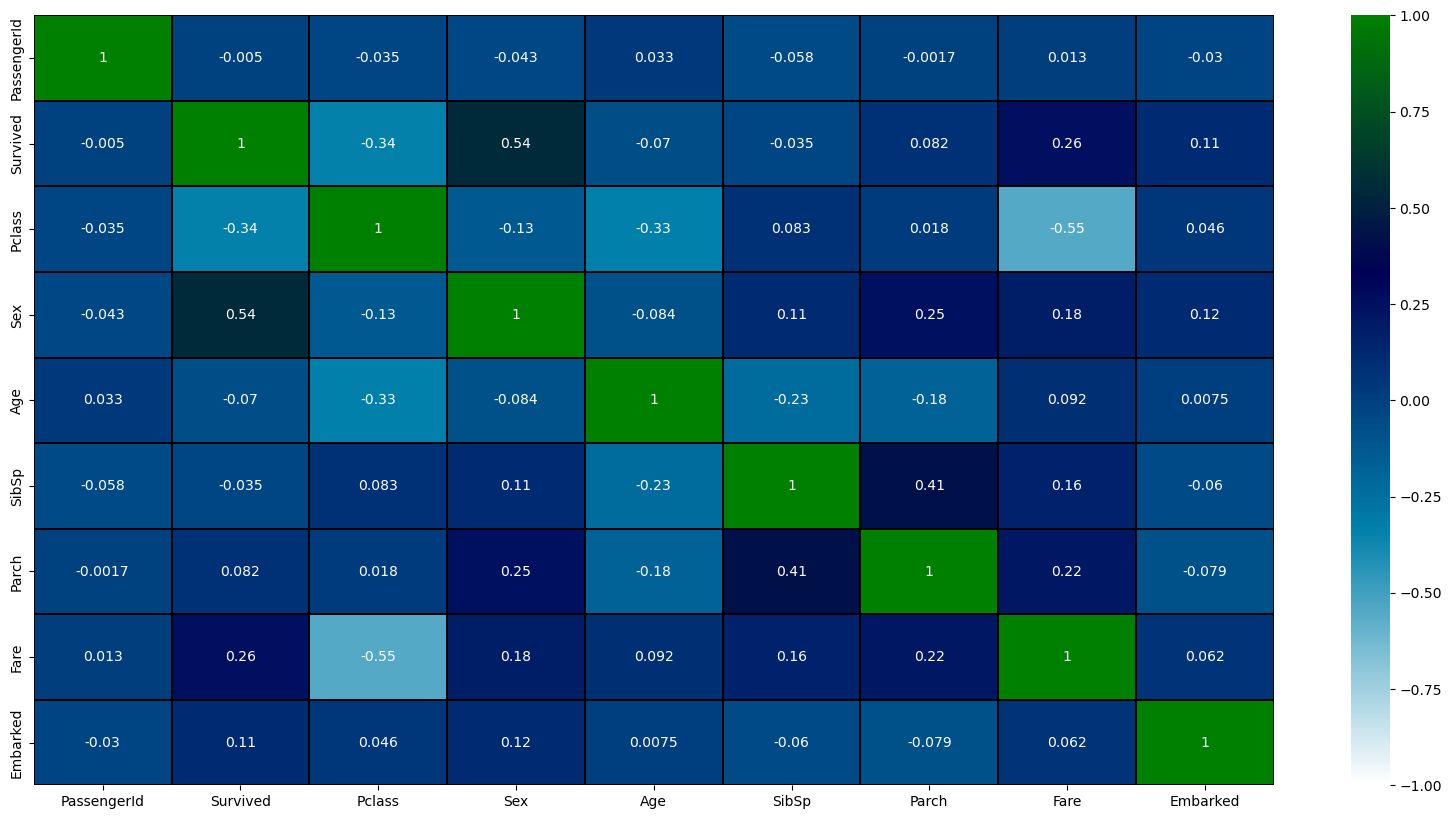

In [862]:
#plotting with correlation Matrix
corr = train_data2.corr()
top_features = corr.index
plt.figure(figsize=(20,10))
sn.heatmap(train_data2[top_features].corr(),annot = True,linecolor='black',cbar='blue',linewidths=0.2,cmap= 'ocean_r',
          vmax=1,vmin=-1)

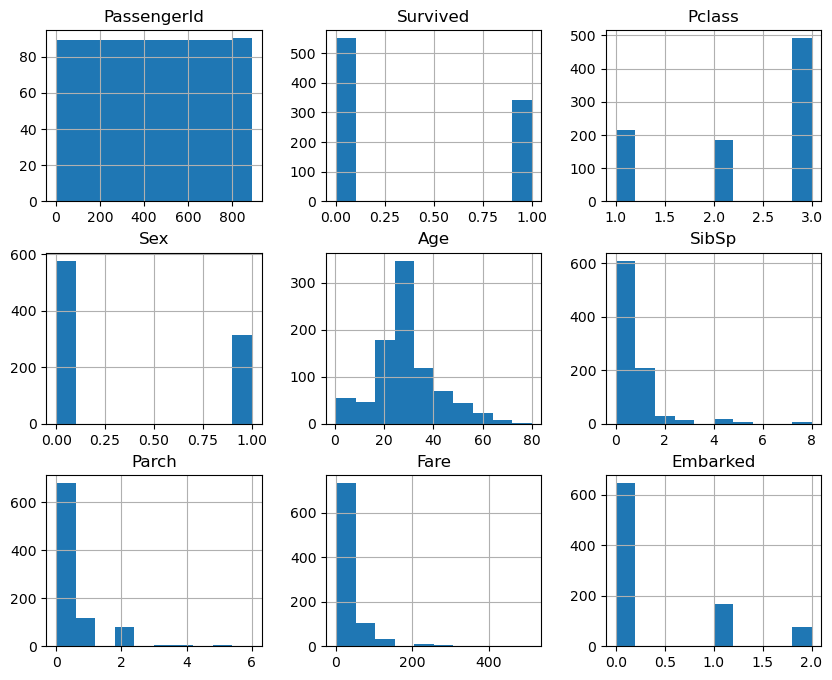

In [865]:
#plotting histogram checking the distribution of data 
train_data2.hist(figsize=(10,8))
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

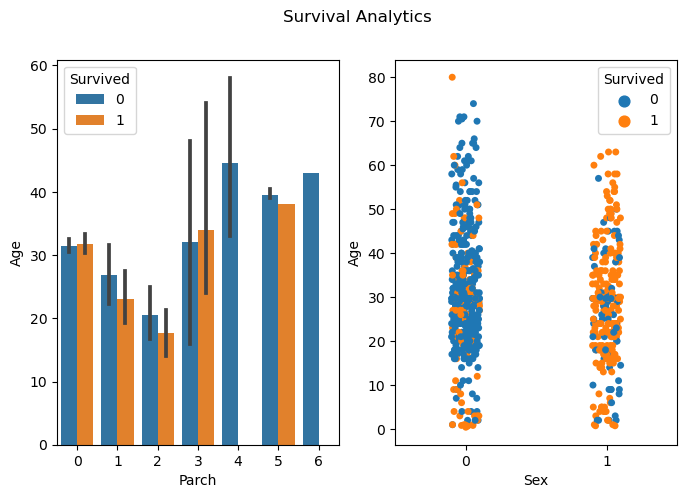

In [866]:
#plotting for insights to gain number of passengers survived 
fig,ax = plt.subplots(1,2,figsize=(8,5))
fig.suptitle('Survival Analytics')
sn.barplot(ax=ax[0],x='Parch',y='Age',data=train_data2,hue='Survived')
sn.stripplot(ax=ax[1],x='Sex',y='Age',data=train_data2,hue = 'Survived')

In the above plots we observe that parents with children had less survival instincts while parents with no children had good survival instincts, while in the stripplot we observe that females have better survival instincts compared to men, this tells us that women  were given preference

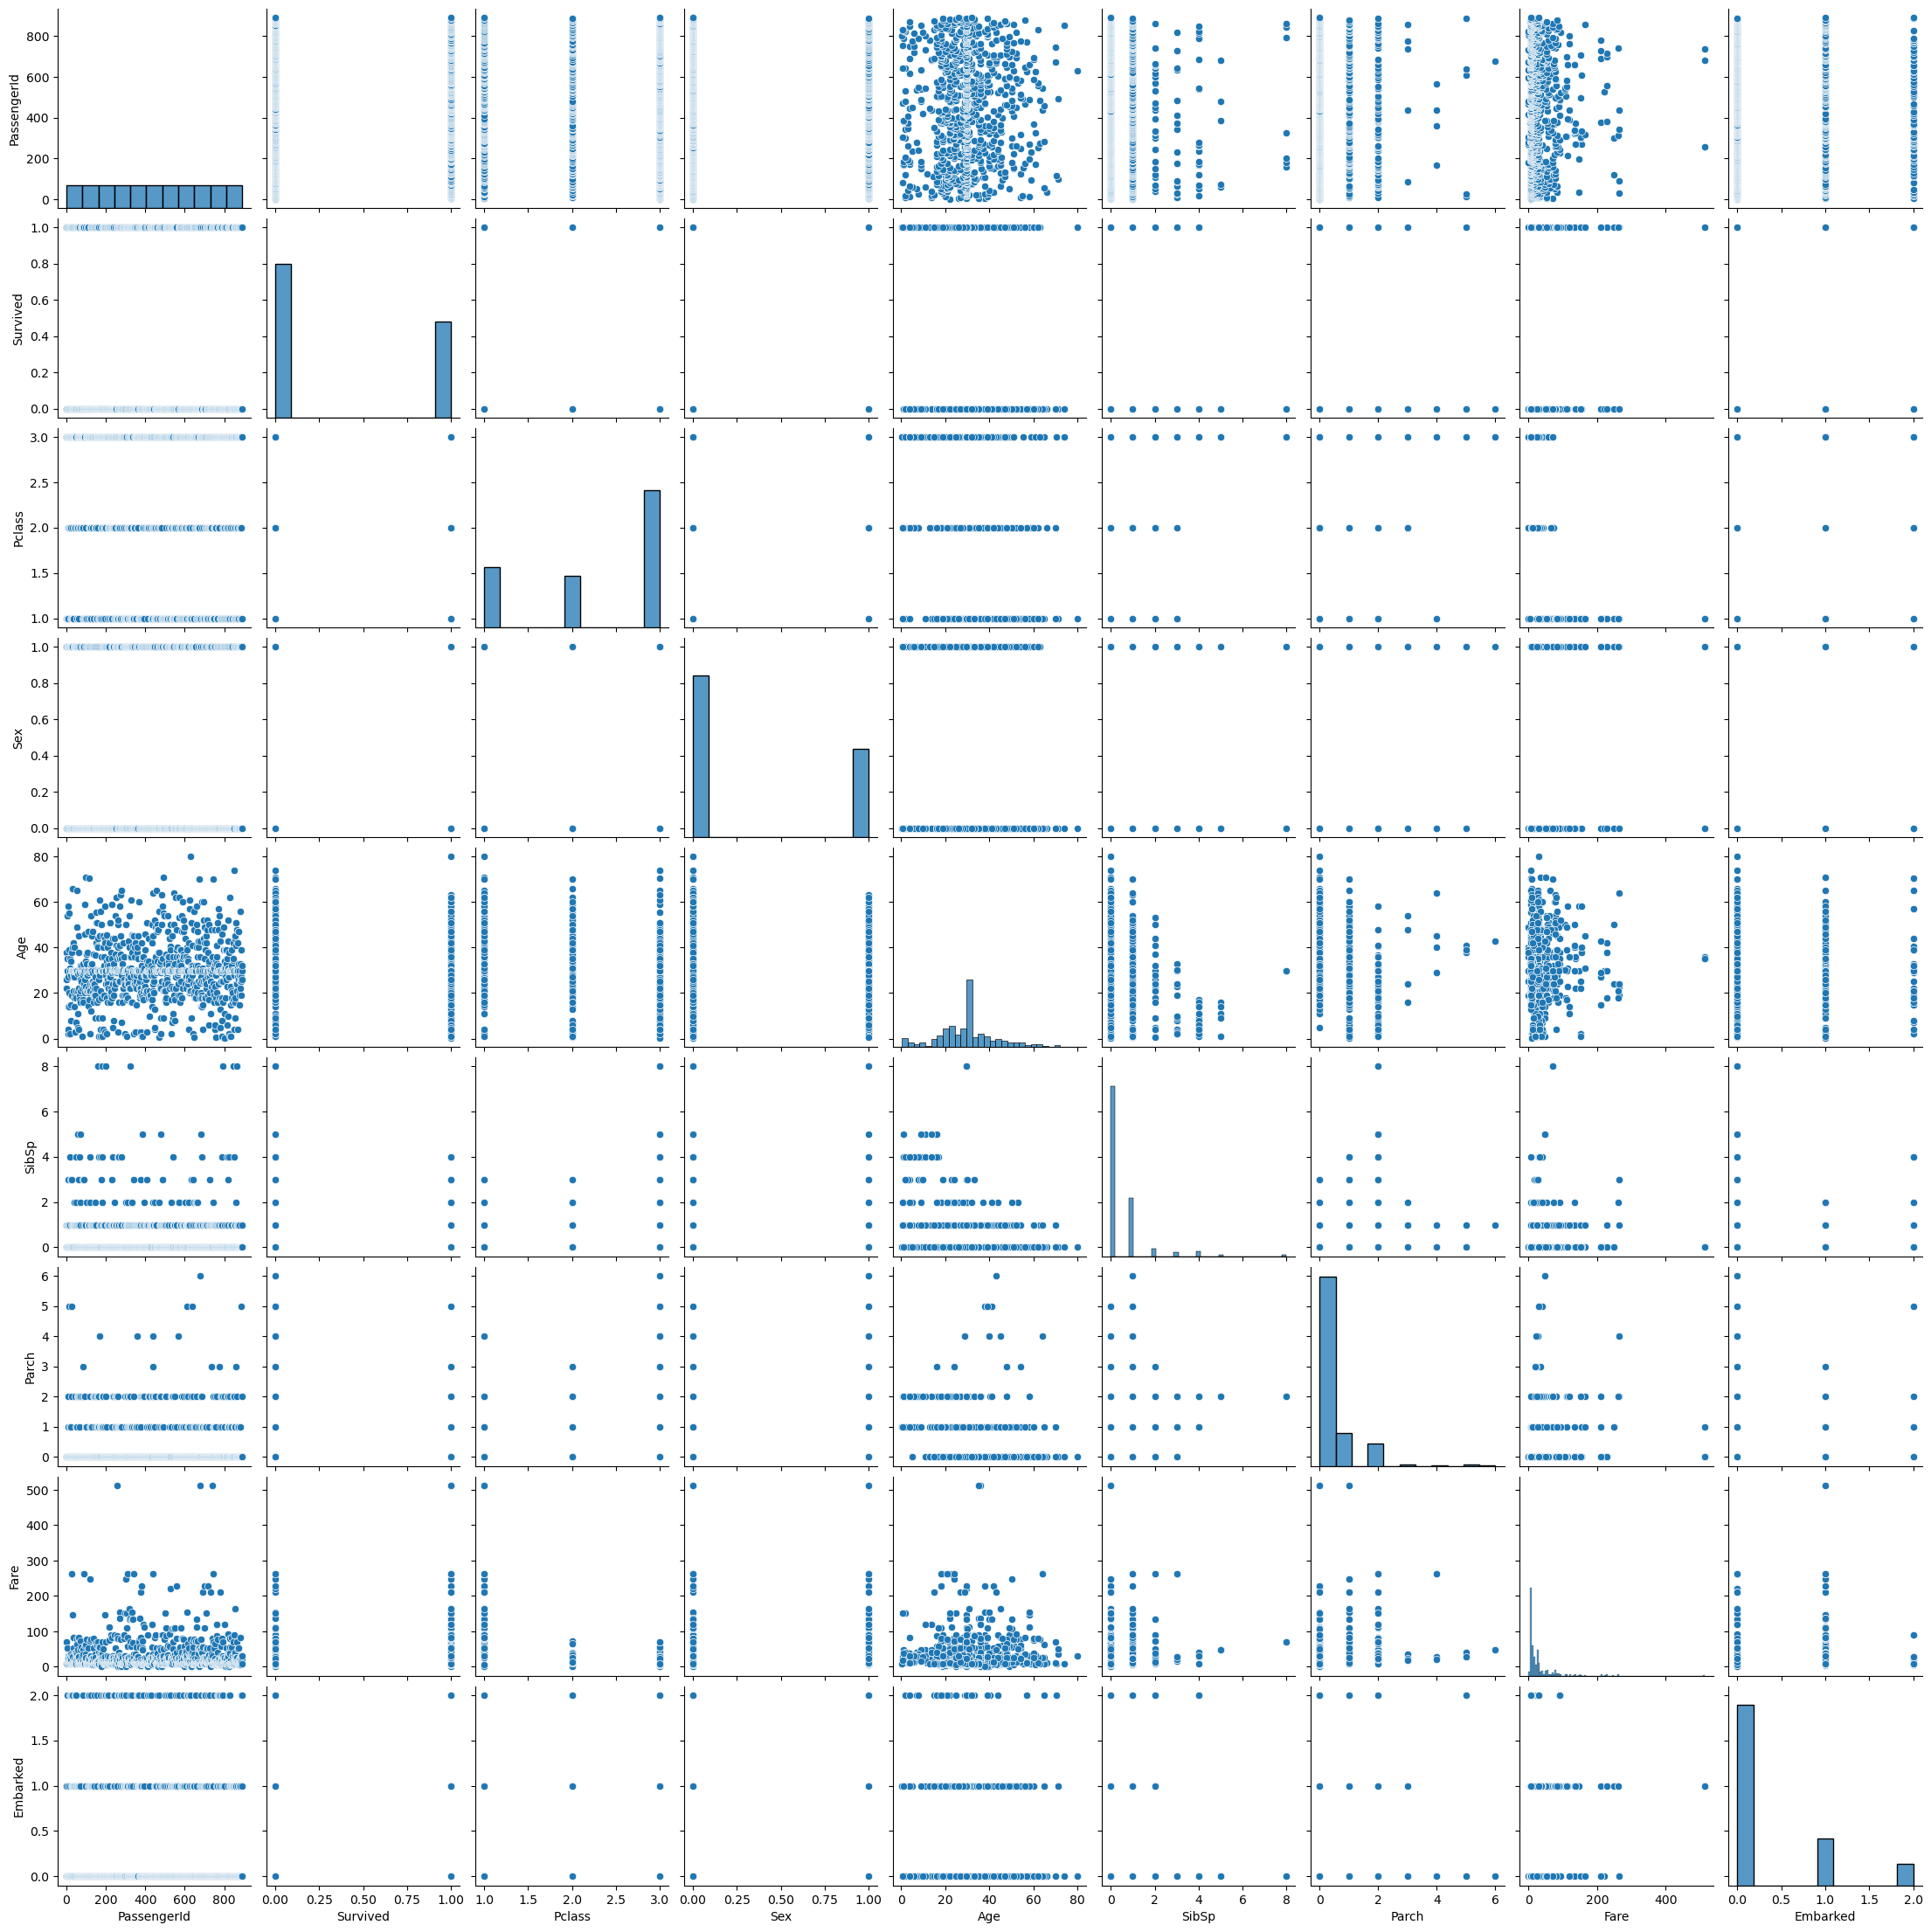

In [817]:
#plotting pairplot 
sn.pairplot(data=train_data2)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

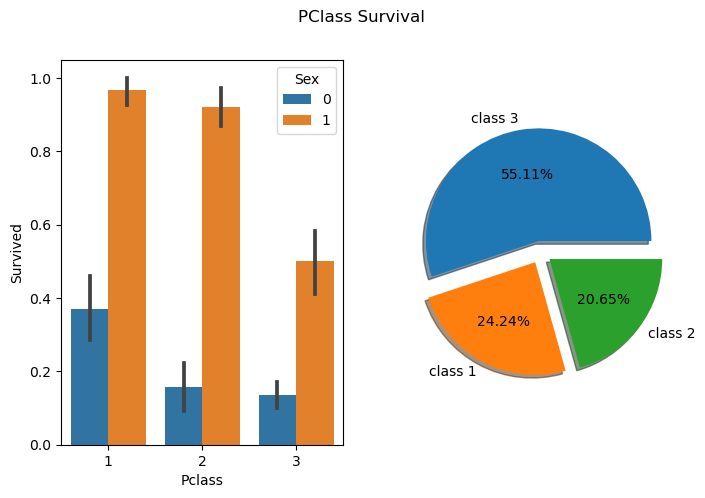

In [867]:
#plotting percentage of passengers survived in Pclass
fig,ax = plt.subplots(1,2,figsize=(8,5))
fig.suptitle('PClass Survival')
plt.pie(train_data2.Pclass.value_counts(),explode=[0.1,0.1,0.1],
       autopct= '%.2f%%',labels=['class 3','class 1','class 2'],shadow=True,data=train_data2.Survived.sum())
sn.barplot(ax = ax[0],x='Pclass',y='Survived',data=train_data2,hue='Sex')

In the above plots the  pie chart shows the distribution of Pclass percentage wise and the bar graph shows us analytics  of survival in the titanic wreck, we can easily observe that in all the classes females have survived the most compared to males.

<AxesSubplot:>

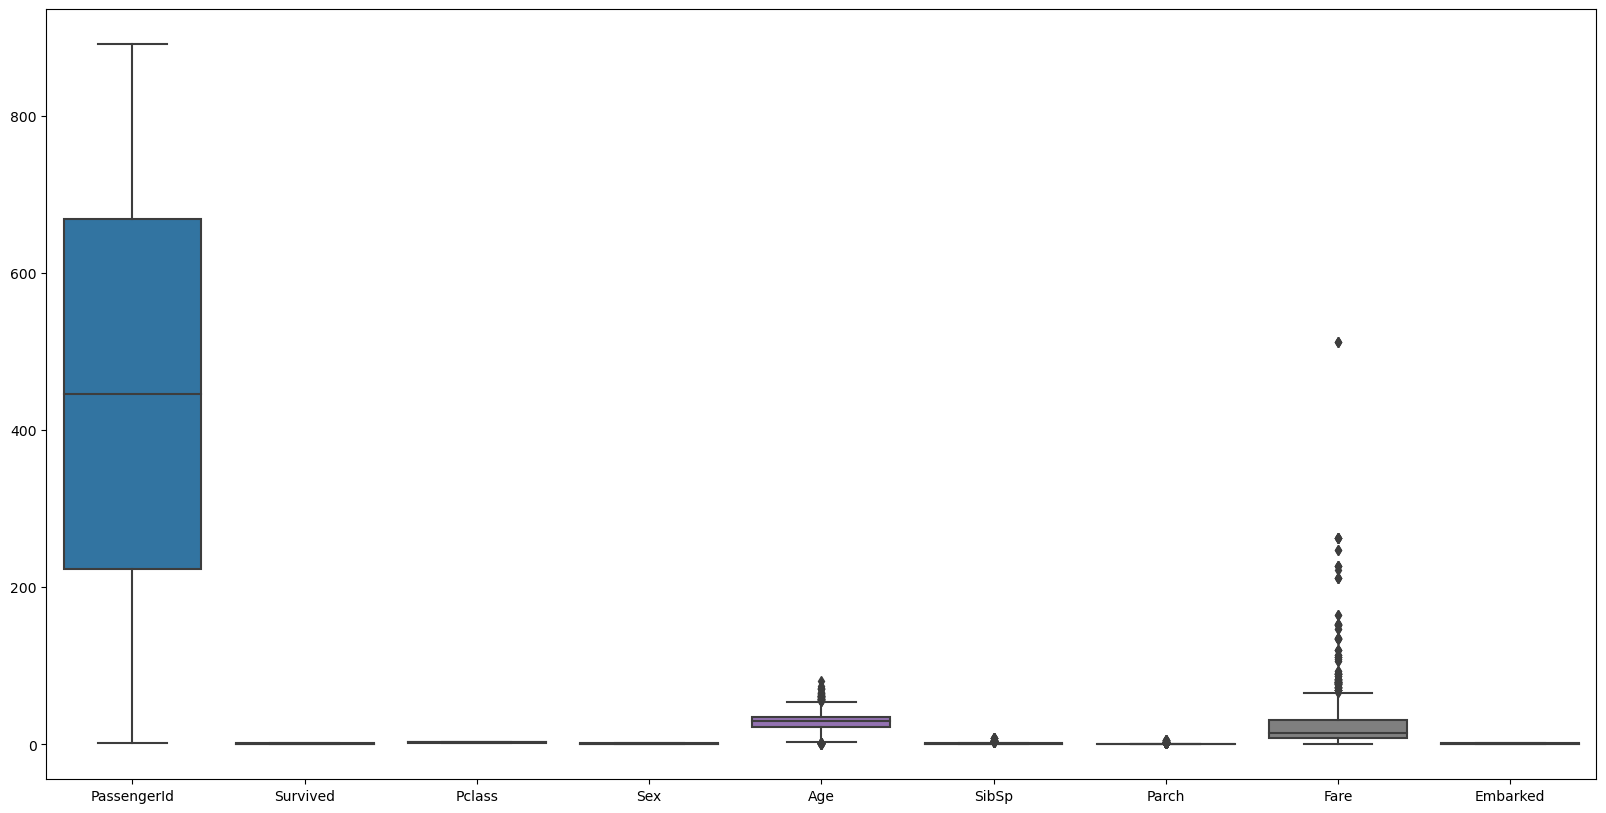

In [868]:
#checking for outliers in our dataset 
plt.figure(figsize=(20,10))
sn.boxplot(data=train_data2)

<AxesSubplot:>

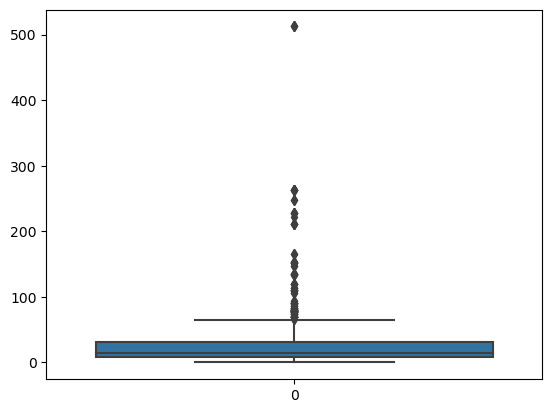

In [869]:
#checking with outliers for Fare
sn.boxplot(data=train_data2['Fare'])

In [870]:
train_data2[train_data2['Fare']>500]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,1,35.0,0,0,512.3292,1
679,680,1,1,0,36.0,0,1,512.3292,1
737,738,1,1,0,35.0,0,0,512.3292,1


In [871]:
percentile25 = train_data2['Fare'].quantile(0.25)
percentile75 = train_data2['Fare'].quantile(0.75)

In [872]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [873]:
train_data2[train_data2['Fare']>upper_limit]
train_data2[train_data2['Fare']<lower_limit]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [874]:
#trimming our outliers 
train_data3 = train_data2[train_data2['Fare']< upper_limit]
train_data3.shape

(775, 9)

In [877]:
#capping or winsorization method 
train_data3['Fare'] = np.where(train_data3['Fare']>upper_limit,
                      upper_limit,
                      np.where(train_data3['Fare']<lower_limit,
                              lower_limit,
                              train_data3['Fare']))

<AxesSubplot:xlabel='Fare'>

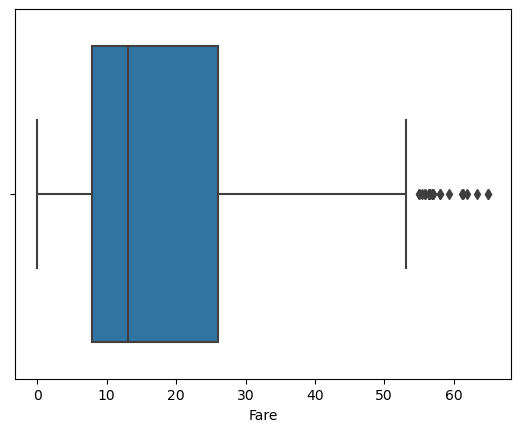

In [880]:
sn.boxplot(train_data3['Fare'])

We have successfully treated our outliers with trimming and then applying capping and winsorization method 

In [883]:
train_data3.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,775.0,445.806452,260.116285,1.00,213.5000,450.000000,670.5,891.0
Survived,775.0,0.339355,0.473796,0.00,0.0000,0.000000,1.0,1.0
Pclass,775.0,2.480000,0.734390,1.00,2.0000,3.000000,3.0,3.0
Sex,775.0,0.314839,0.464752,0.00,0.0000,0.000000,1.0,1.0
Age,775.0,29.103880,12.779988,0.42,22.0000,29.699118,34.0,80.0
SibSp,775.0,0.437419,0.899838,0.00,0.0000,0.000000,1.0,5.0
Parch,775.0,0.340645,0.785914,0.00,0.0000,0.000000,0.0,6.0
Fare,775.0,17.822091,13.578085,0.00,7.8958,13.000000,26.0,65.0
Embarked,775.0,0.343226,0.647697,0.00,0.0000,0.000000,0.0,2.0


<AxesSubplot:>

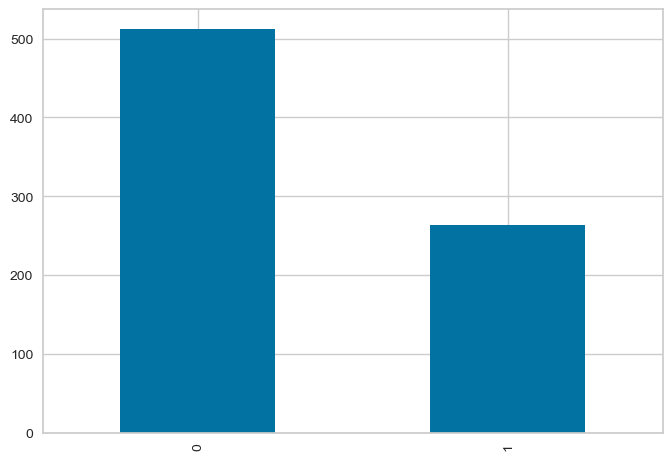

In [1400]:
#checking people survived 
train_data3.Survived.value_counts().plot(kind='bar')

In [885]:
train_data3.Survived.value_counts()

0    512
1    263
Name: Survived, dtype: int64

In [886]:
train_data3.Survived.mean()

0.3393548387096774

We oberve that we have imbalanced data hence we can treat it by upsampling or undersampling but we will go with upsampling since we have no risk of losing information

In [888]:
train_data3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
5,6,0,3,0,29.699118,0,0,8.4583,2


## Feature Engineering and Selection

In [889]:
train_data4 = train_data3[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked','Survived']]

In [890]:
train_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    775 non-null    int64  
 1   Sex       775 non-null    int64  
 2   Age       775 non-null    float64
 3   SibSp     775 non-null    int64  
 4   Parch     775 non-null    int64  
 5   Fare      775 non-null    float64
 6   Embarked  775 non-null    int64  
 7   Survived  775 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.5 KB


In [892]:
train_data4.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,775.0,2.480000,0.734390,1.00,2.0000,3.000000,3.0,3.0
Sex,775.0,0.314839,0.464752,0.00,0.0000,0.000000,1.0,1.0
Age,775.0,29.103880,12.779988,0.42,22.0000,29.699118,34.0,80.0
SibSp,775.0,0.437419,0.899838,0.00,0.0000,0.000000,1.0,5.0
Parch,775.0,0.340645,0.785914,0.00,0.0000,0.000000,0.0,6.0
Fare,775.0,17.822091,13.578085,0.00,7.8958,13.000000,26.0,65.0
Embarked,775.0,0.343226,0.647697,0.00,0.0000,0.000000,0.0,2.0
Survived,775.0,0.339355,0.473796,0.00,0.0000,0.000000,1.0,1.0


In [1119]:
train_data4

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.000000,1,0,7.2500,0,0
2,3,1,26.000000,0,0,7.9250,0,1
3,1,1,35.000000,1,0,53.1000,0,1
4,3,0,35.000000,0,0,8.0500,0,0
5,3,0,29.699118,0,0,8.4583,2,0
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0
887,1,1,19.000000,0,0,30.0000,0,1
888,3,1,29.699118,1,2,23.4500,0,0
889,1,0,26.000000,0,0,30.0000,1,1


In [898]:
#chi square analysis: splitting our variable into train and test 
X = train_data4.iloc[:,0:7]
y = train_data4.iloc[:,7]
print(X.shape,y.shape)

(775, 7) (775,)


In [899]:
#fitting our model on chi test 
best_feat = SelectKBest(score_func=chi2,k=6)
feat_sel = best_feat.fit(X,y)

In [900]:
#summarise scores
scores = feat_sel.scores_
features = feat_sel.transform(X)

In [901]:
#fiiting our scores in a dataframe
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                       columns = ['score','feature'])
score_df.sort_values(by='score',ascending=False,inplace=True)
score_df


,score,feature
5,440.003975,Fare
1,132.690781,Sex
2,63.892535,Age
4,13.637228,Parch
0,9.577130,Pclass
6,6.528618,Embarked
3,0.014267,SibSp


In [904]:
#plotting feature selection by extratrees classifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [906]:
print(model.feature_importances_)

[0.08230616 0.25481645 0.28316433 0.04260582 0.04748072 0.25655892
 0.03306761]


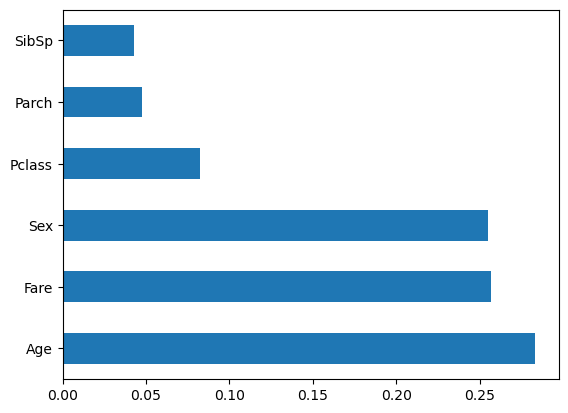

In [908]:
#selection for our to 5 features 
ranked_feat = pd.Series(model.feature_importances_,index=X.columns)
ranked_feat.nlargest(6).plot(kind = 'barh')
plt.show()

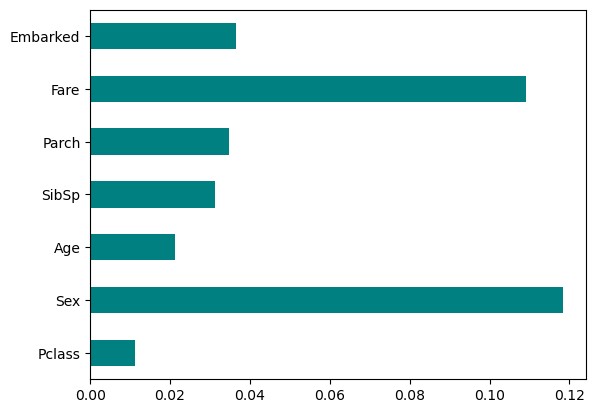

In [909]:
#plotting with information gain 
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,train_data4.columns[0:len(train_data4.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()

## Recursive Elimination method 

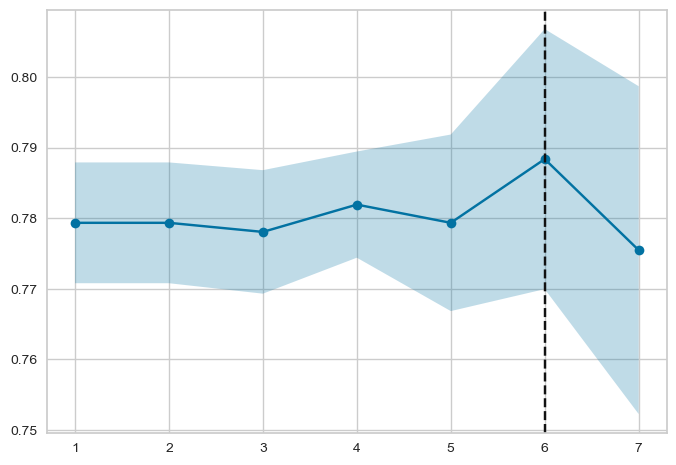

In [923]:
model_r = LogisticRegression()
rfe = RFECV(model_r)
fit = rfe.fit(X,y)

In [924]:
fit.n_features_

6

In [925]:
#selected features 
fit.support_

array([ True,  True,  True,  True,  True, False,  True])

In [927]:
#feature ranking 
fit.ranking_

array([1, 1, 1, 1, 1, 2, 1])

In [928]:
#checking for columns required 
for i,col in zip(range(X.shape[1]),X.columns):
    print(f"{col} selected = {fit.support_[i]} rank = {fit.ranking_[i]}")

Pclass selected = True rank = 1
Sex selected = True rank = 1
Age selected = True rank = 1
SibSp selected = True rank = 1
Parch selected = True rank = 1
Fare selected = False rank = 2
Embarked selected = True rank = 1


In [996]:
##selecting our top columns after feature selection 
train_data5 = train_data4[['Sex','Age','SibSp','Parch','Pclass','Embarked','Survived']]

In [1125]:
train_data5

,Sex,Age,SibSp,Parch,Pclass,Embarked,Survived
0,0,22.000000,1,0,3,0,0
2,1,26.000000,0,0,3,0,1
3,1,35.000000,1,0,1,0,1
4,0,35.000000,0,0,3,0,0
5,0,29.699118,0,0,3,2,0
...,...,...,...,...,...,...,...
886,0,27.000000,0,0,2,0,0
887,1,19.000000,0,0,1,0,1
888,1,29.699118,1,2,3,0,0
889,0,26.000000,0,0,1,1,1


As we had observed before that our dependent variable is not balanced we have to yet treat by oversampling 

In [1047]:
train_data5.Survived.value_counts()

0    512
1    263
Name: Survived, dtype: int64

In [1139]:
print(X_res.shape,y_res.shape)

(775, 6) (775,)


In [1140]:
## splitting our data
X_res_train,X_res_test,y_res_train,y_res_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

In [1141]:
print(X_res_train.shape,y_res_train.shape)
print(X_res_test.shape,y_res_test.shape)

(620, 6) (620,)
(155, 6) (155,)


In [1142]:
#evaluate algorithms 
num_folds = 8
scoring ='accuracy'

#check which algorithm is best 
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=None)
    cv_results = cross_val_score(model,
                                X_res_train,
                                y_res_train,
                                cv=kfold,
                                scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.779013 (0.039476)
KNN:0.782218 (0.059702)
CART:0.804945 (0.034235)
NB:0.777514 (0.033399)
SVM:0.680590 (0.044638)


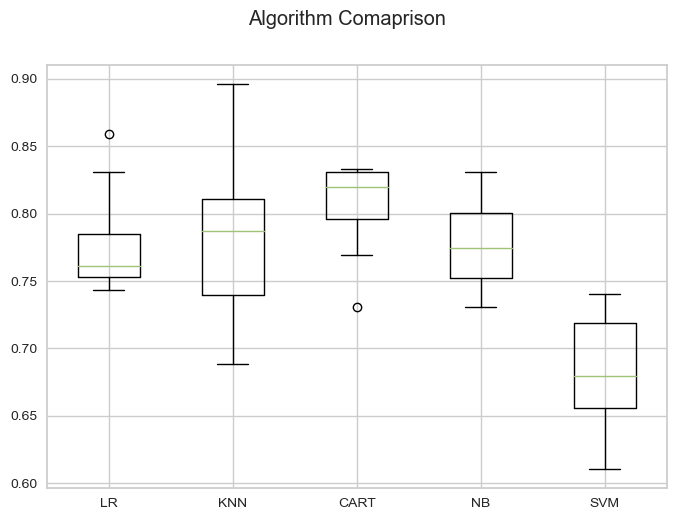

In [1143]:
#compare the algorithms 
fig = plt.figure()
fig.suptitle('Algorithm Comaprison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1144]:
#standardising the dataset 
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))

results = []
names= []


for name,model in pipelines:
    kfold = KFold(n_splits=num_folds,random_state=None)
    cv_results = cross_val_score(model,
                                X_res_train,
                                y_res_train,
                                cv=kfold,
                                scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
    


ScaledLR:0.777410 (0.041108)
ScaledKNN:0.806568 (0.041224)
ScaledCART:0.806548 (0.023268)
ScaledNB:0.777514 (0.033399)
ScaledSVM:0.840410 (0.028416)


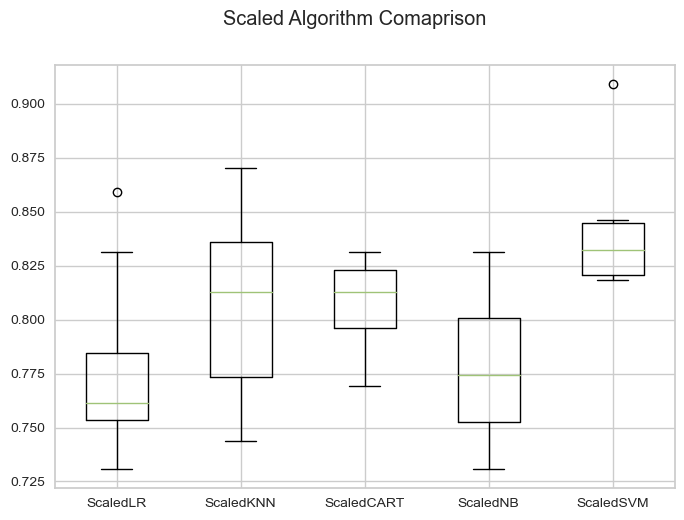

In [1145]:
#compare the algorithms 
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comaprison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## KNN Algorithm

In [1146]:
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)

neighbors = [1,2,3,4,5,6,7,8,9,10]
param_grid = dict(n_neighbors = neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds,random_state=None)

grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)
print("Best:%f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best:0.819472 using {'n_neighbors': 10}


In [1147]:
means = grid_result.cv_results_['mean_test_score']
stds =  grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [1148]:
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

0.751665 (0.032249) with: {'n_neighbors': 1}
0.798472 (0.031579) with: {'n_neighbors': 2}
0.814581 (0.028211) with: {'n_neighbors': 3}
0.798472 (0.042382) with: {'n_neighbors': 4}
0.808150 (0.038540) with: {'n_neighbors': 5}
0.800075 (0.035586) with: {'n_neighbors': 6}
0.817870 (0.035599) with: {'n_neighbors': 7}
0.811334 (0.026318) with: {'n_neighbors': 8}
0.814665 (0.029280) with: {'n_neighbors': 9}
0.819472 (0.028143) with: {'n_neighbors': 10}


## SVM Algorithm

In [1150]:
##fine tune svm classifier 
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)

c_val = [0.1,0.01,0.5]
kernel_val = ['linear','poly','rbf','sigmoid']
gamma = [0.1,0.01,0.5]

param_grid = dict(kernel= kernel_val,C = c_val,gamma=gamma)
model = SVC()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.827464 using {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}


In [1151]:
means = grid_result.cv_results_['mean_test_score']
stds =  grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [1152]:
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

0.780636 (0.044358) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.701486 (0.049361) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
0.796807 (0.046887) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.780636 (0.044358) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.780636 (0.044358) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.674055 (0.053373) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
0.674055 (0.053373) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.674055 (0.053373) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.780636 (0.044358) with: {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}
0.811376 (0.018377) with: {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}
0.769252 (0.036366) with: {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
0.703068 (0.060498) with: {'C': 0.1, 'gamma': 0.5, 'kernel': 'sigmoid'}
0.780636 (0.044358) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.674055 (0.053373) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
0.674055 (0.05

## Application of ensemble methods

In [1153]:
ensembles = []

ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('BG',BaggingClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))


results = []
names = []

for name,model in ensembles:
    kfold = KFold(n_splits=num_folds,random_state=None)
    cv_results = cross_val_score(model,
                                X_res_train,
                                y_res_train,
                                cv=kfold,
                                scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)



AB:0.803322 (0.035372)
GBM:0.846945 (0.043459)
RF:0.829067 (0.018669)
BG:0.827485 (0.023655)
ET:0.813020 (0.026523)


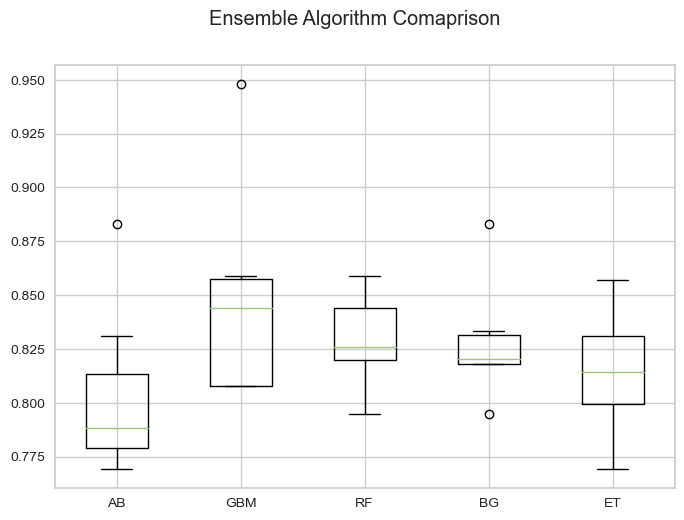

In [1154]:
#compare the algorithms 
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comaprison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## SVM model

In [1155]:
scaler = StandardScaler().fit(X_res_train)
X_scl = scaler.transform(X_res_train)
s_model = SVC(kernel='rbf',C=0.5,gamma=0.5)
s_model.fit(X_scl,y_res_train)

SVC(C=0.5, gamma=0.5)

In [1156]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
predictions = s_model.predict(rescaled_valX)
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [1157]:
print(accuracy_score(y_res_test,predictions))

0.7612903225806451


In [1158]:
print(confusion_matrix(y_res_test,predictions))

[[88  6]
 [31 30]]


In [1159]:
print(classification_report(y_res_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        94
           1       0.83      0.49      0.62        61

    accuracy                           0.76       155
   macro avg       0.79      0.71      0.72       155
weighted avg       0.78      0.76      0.74       155



## Random Forest Classifier

In [1160]:
#fitting Random forest on our training Data
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)

max_depth = [2,3,4,5]
max_features = [2,4,6]
n_estimators = [20,40,60,100]

param_grid = dict(max_depth=max_depth,max_features=max_features,n_estimators=n_estimators)
model = RandomForestClassifier()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.835560 using {'max_depth': 5, 'max_features': 6, 'n_estimators': 60}


In [1161]:
means = grid_result.cv_results_['mean_test_score']
stds =  grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [1162]:
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

0.816267 (0.039620) with: {'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
0.806485 (0.041312) with: {'max_depth': 2, 'max_features': 2, 'n_estimators': 40}
0.803218 (0.027203) with: {'max_depth': 2, 'max_features': 2, 'n_estimators': 60}
0.801615 (0.034624) with: {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}
0.793581 (0.040736) with: {'max_depth': 2, 'max_features': 4, 'n_estimators': 20}
0.793561 (0.036427) with: {'max_depth': 2, 'max_features': 4, 'n_estimators': 40}
0.796828 (0.045357) with: {'max_depth': 2, 'max_features': 4, 'n_estimators': 60}
0.795205 (0.032795) with: {'max_depth': 2, 'max_features': 4, 'n_estimators': 100}
0.779054 (0.028992) with: {'max_depth': 2, 'max_features': 6, 'n_estimators': 20}
0.777452 (0.028347) with: {'max_depth': 2, 'max_features': 6, 'n_estimators': 40}
0.772602 (0.031490) with: {'max_depth': 2, 'max_features': 6, 'n_estimators': 60}
0.782259 (0.026216) with: {'max_depth': 2, 'max_features': 6, 'n_estimators': 100}
0.804945 (0.0

In [1163]:
scaler = StandardScaler().fit(X_res_train)
scaledX = scaler.transform(X_res_train)
r_model = RandomForestClassifier(max_depth=5,max_features=6,n_estimators=60)
r_model.fit(scaledX,y_res_train)

RandomForestClassifier(max_depth=5, max_features=6, n_estimators=60)

In [1164]:
#predictions 
rescaled_val_X = scaler.transform(X_res_test)
preds_ran = r_model.predict(rescaled_val_X)
preds_ran

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [1165]:
print(accuracy_score(y_res_test,preds_ran))

0.7806451612903226


In [1166]:
print(confusion_matrix(y_res_test,preds_ran))

[[86  8]
 [26 35]]


In [1167]:
print(classification_report(y_res_test,preds_ran))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        94
           1       0.81      0.57      0.67        61

    accuracy                           0.78       155
   macro avg       0.79      0.74      0.75       155
weighted avg       0.79      0.78      0.77       155



## Logistic Regression

In [1168]:
#fitting logistic regression on our training Data
scaler = StandardScaler().fit(X_res_train)
scaledX = scaler.transform(X_res_train)

penalty = ['l2','l1','elasticnet']


param_grid = dict(penalty=penalty)
model = LogisticRegression()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.777410 using {'penalty': 'l2'}


In [1169]:
scaler = StandardScaler().fit(X_res_train)
X_scaled = scaler.transform(X_res_train)
l_model = LogisticRegression()
l_model.fit(X_scaled,y_res_train)

LogisticRegression()

In [1170]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
preds_log = l_model.predict(rescaled_valX)
preds_log

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0], dtype=int64)

In [1171]:
print(accuracy_score(y_res_test,preds_log))

0.8064516129032258


In [1172]:
print(confusion_matrix(y_res_test,preds_log))

[[78 16]
 [14 47]]


In [1173]:
print(classification_report(y_res_test,preds_log))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        94
           1       0.75      0.77      0.76        61

    accuracy                           0.81       155
   macro avg       0.80      0.80      0.80       155
weighted avg       0.81      0.81      0.81       155



## KNN algorithm

In [1174]:
scaler = StandardScaler().fit(X_res_train)
X_sca = scaler.transform(X_res_train)
k_model = KNeighborsClassifier(n_neighbors=10)
k_model.fit(X_sca,y_res_train)

KNeighborsClassifier(n_neighbors=10)

In [1175]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
preds_knn = k_model.predict(rescaled_valX)
preds_knn

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [1176]:
print(accuracy_score(y_res_test,preds_knn))

0.7870967741935484


In [1177]:
print(confusion_matrix(y_res_test,preds_knn))

[[88  6]
 [27 34]]


In [1178]:
print(classification_report(y_res_test,preds_knn))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84        94
           1       0.85      0.56      0.67        61

    accuracy                           0.79       155
   macro avg       0.81      0.75      0.76       155
weighted avg       0.80      0.79      0.78       155



## Gradient Boosting

In [1179]:
##fine tune gradient boosting classifier 
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)

learning_rate = [0.1,0.01,0.001]
n_estimators = [10,20,40,60]

param_grid = dict(learning_rate=learning_rate,n_estimators=n_estimators)
model = GradientBoostingClassifier()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.835644 using {'learning_rate': 0.1, 'n_estimators': 60}


In [1180]:
scaler = StandardScaler().fit(X_res_train)
g_scaled = scaler.transform(X_res_train)
g_model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=60)
g_model.fit(g_scaled,y_res_train)

GradientBoostingClassifier(n_estimators=60)

In [1181]:
#predictions 
scaled_gr = scaler.transform(X_res_test)
preds_grad = g_model.predict(scaled_gr)
preds_grad

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [1182]:
print(accuracy_score(y_res_test,preds_grad))

0.8064516129032258


In [1183]:
print(confusion_matrix(y_res_test,preds_grad))

[[86  8]
 [22 39]]


In [1184]:
print(classification_report(y_res_test,preds_grad))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        94
           1       0.83      0.64      0.72        61

    accuracy                           0.81       155
   macro avg       0.81      0.78      0.79       155
weighted avg       0.81      0.81      0.80       155



## Extratrees Classifier

In [1185]:
##fine tune svm classifier 
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)

criterion =['entropy','gini']
n_estimators = [10,20,40,60]
max_depth =[2,3,4,5]

param_grid = dict(criterion=criterion,n_estimators=n_estimators,max_depth=max_depth)
model = ExtraTreesClassifier()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.819431 using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 60}


In [1186]:
scale_ext = StandardScaler().fit(X_res_train)
ext_scaled = scaler.transform(X_res_train)
ext_model = ExtraTreesClassifier(criterion='gini',max_depth=5,n_estimators=60)
ext_model.fit(ext_scaled,y_res_train)

ExtraTreesClassifier(max_depth=5, n_estimators=60)

In [1187]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
preds_ext = ext_model.predict(rescaled_valX)
preds_ext

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [1188]:
print(confusion_matrix(y_res_test,preds_ext))

[[84 10]
 [22 39]]


In [1189]:
print(classification_report(y_res_test,preds_ext))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        94
           1       0.80      0.64      0.71        61

    accuracy                           0.79       155
   macro avg       0.79      0.77      0.77       155
weighted avg       0.79      0.79      0.79       155



## Adaboost classifier

In [1190]:
#fitting logistic regression on our training Data
scaler = StandardScaler().fit(X_res_train)
scaledX = scaler.transform(X_res_train)

learning_rate = [0.1,0.01,1]


param_grid = dict(learning_rate=learning_rate)
model = AdaBoostClassifier()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.803322 using {'learning_rate': 1}


In [1191]:
scale_ada = StandardScaler().fit(X_res_train)
ada_scaled = scale_ada.transform(X_res_train)
ada_model = AdaBoostClassifier(learning_rate=1)
ada_model.fit(ada_scaled,y_res_train)

AdaBoostClassifier(learning_rate=1)

In [1192]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
preds_ada = ada_model.predict(rescaled_valX)
preds_ada

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0], dtype=int64)

In [1193]:
print(confusion_matrix(y_res_test,preds_ada))

[[81 13]
 [17 44]]


In [1194]:
print(classification_report(y_res_test,preds_ada))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        94
           1       0.77      0.72      0.75        61

    accuracy                           0.81       155
   macro avg       0.80      0.79      0.79       155
weighted avg       0.81      0.81      0.81       155



In [1361]:
print(accuracy_score(y_res_test,preds_ada))

0.8064516129032258


## Bagging Classifier



In [1195]:
##fine tune svm classifier 
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)


n_estimators = [10,20,40,60]
max_features =[2,3,4,5]

param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = BaggingClassifier()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.843615 using {'max_features': 4, 'n_estimators': 60}


In [1196]:
scale_bag = StandardScaler().fit(X_res_train)
bag_scaled = scale_bag.transform(X_res_train)
b_model = BaggingClassifier(max_features=4,n_estimators=60)
b_model.fit(bag_scaled,y_res_train)

BaggingClassifier(max_features=4, n_estimators=60)

In [1197]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
preds_bag = b_model.predict(rescaled_valX)
preds_bag

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [1198]:
print(confusion_matrix(y_res_test,preds_bag))

[[79 15]
 [24 37]]


In [1199]:
print(classification_report(y_res_test,preds_bag))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        94
           1       0.71      0.61      0.65        61

    accuracy                           0.75       155
   macro avg       0.74      0.72      0.73       155
weighted avg       0.75      0.75      0.74       155



In [1200]:
print(accuracy_score(y_res_test,preds_bag))

0.7483870967741936


## Decision tree Classifier

In [1201]:
##fine tune svm classifier 
scaler = StandardScaler().fit(X_res_train)
scaled_X = scaler.transform(X_res_train)

criterion =['entropy','gini']
ccp_alpha = [0.0,0.1,0.01,0.5]
max_depth =[2,3,4,5]

param_grid = dict(criterion=criterion,ccp_alpha = ccp_alpha,max_depth=max_depth)
model = DecisionTreeClassifier()

kfold = KFold(n_splits=num_folds,random_state=None)
grid = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring=scoring,
                   cv=kfold)
grid_result = grid.fit(scaled_X,y_res_train)

print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best : 0.827423 using {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 4}


In [1203]:
scale_dec = StandardScaler().fit(X_res_train)
dec_scaled = scale_dec.transform(X_res_train)
d_model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
d_model.fit(dec_scaled,y_res_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [1204]:
#predictions 
rescaled_valX = scaler.transform(X_res_test)
preds_dec = d_model.predict(rescaled_valX)
preds_dec

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [1205]:
print(confusion_matrix(y_res_test,preds_dec))

[[86  8]
 [24 37]]


In [1206]:
print(classification_report(y_res_test,preds_dec))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        94
           1       0.82      0.61      0.70        61

    accuracy                           0.79       155
   macro avg       0.80      0.76      0.77       155
weighted avg       0.80      0.79      0.79       155



In [1207]:
print(accuracy_score(y_res_test,preds_dec))

0.7935483870967742


## Validating Test data

In [1313]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1314]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1315]:
#checking for any null values 
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Feature preprocessing on Test data

In [1316]:
mean_test = test_data['Age'].mean()
print(mean_test)

30.272590361445783


In [1317]:
test_data['Age']= test_data['Age'].fillna(mean_test)

In [1318]:
mode_cabin = test_data['Cabin'].mode().iloc[0]
print(mode_cabin)

B57 B59 B63 B66


In [1319]:
test_data['Cabin'] = test_data['Cabin'].fillna(mode_cabin)

In [1320]:
mean_f = test_data['Fare'].mean()
print(mean_f)

35.6271884892086


In [1321]:
test_data['Fare'] = test_data['Fare'].fillna(mean_f)

In [1322]:
test_data.Cabin.value_counts()

B57 B59 B63 B66    330
C89                  2
C116                 2
C80                  2
C55 C57              2
                  ... 
E45                  1
E52                  1
D30                  1
C62 C64              1
C105                 1
Name: Cabin, Length: 76, dtype: int64

In [1323]:
test_data2 = test_data

In [1325]:
test_data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [1326]:
def clean_data(test):
    test = re.sub('\[.*?\]','',test) 
    test = re.sub('[^a-zA-z]','',test)
    
    return test
clean3 = lambda x: clean_data(x)

In [1327]:
test_data2['Cabin'] = test_data2.Cabin.apply(clean3)


In [1328]:
test_data2.Cabin.value_counts()

BBBB    330
C        29
B        12
D        12
E         8
A         7
F         5
CC        4
CCC       2
FE        2
BBB       2
FG        1
G         1
BB        1
DD        1
EE        1
Name: Cabin, dtype: int64

In [1329]:
test_data2.Cabin = test_data2.Cabin.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,
                                           'CCC':8,'CC':9,'FG':10,'BBBB':11,'BB':12,
                                           'DD':13,'FE':14,'BBB':15,'DD':16,'EE':17
                                         ,'BBB':18
    
                                          })

In [1330]:
test_data2.Cabin.value_counts()

11    330
2      29
1      12
3      12
4       8
0       7
5       5
9       4
8       2
14      2
18      2
10      1
6       1
12      1
16      1
17      1
Name: Cabin, dtype: int64

In [1331]:
test_data3 = test_data2[['Sex','Age','SibSp','Parch','Pclass','Embarked']]

In [1332]:
test_data3

,Sex,Age,SibSp,Parch,Pclass,Embarked
0,male,34.50000,0,0,3,Q
1,female,47.00000,1,0,3,S
2,male,62.00000,0,0,2,Q
3,male,27.00000,0,0,3,S
4,female,22.00000,1,1,3,S
...,...,...,...,...,...,...
413,male,30.27259,0,0,3,S
414,female,39.00000,0,0,1,C
415,male,38.50000,0,0,3,S
416,male,30.27259,0,0,3,S


In [1333]:
test_data3.Sex = test_data3.Sex.map({'female':1,'male':0})

test_data3.Embarked = test_data3.Embarked.map({'S':0,'C':1,'Q':2})

In [1334]:
test_data4 = test_data3[['Sex','Age','SibSp','Parch','Pclass','Embarked']]

In [1335]:
test_data4

,Sex,Age,SibSp,Parch,Pclass,Embarked
0,0,34.50000,0,0,3,2
1,1,47.00000,1,0,3,0
2,0,62.00000,0,0,2,2
3,0,27.00000,0,0,3,0
4,1,22.00000,1,1,3,0
...,...,...,...,...,...,...
413,0,30.27259,0,0,3,0
414,1,39.00000,0,0,1,1
415,0,38.50000,0,0,3,0
416,0,30.27259,0,0,3,0


In [1336]:
def clean_data(test):
    test = re.sub('\[.*?\]','',test) 
    test = re.sub('[^0-9]','',test)
    
    return test
clean2 = lambda x: clean_data(x)

In [1337]:
test_data['Ticket'] = test_data.Ticket.apply(clean2)


In [1379]:

#predictions for survived using Logistic regression
scaled = StandardScaler()
rescaled = scaled.fit_transform(test_data4)
fina_preds = l_model.predict(rescaled)

In [1380]:
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':fina_preds})

In [1381]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1341]:
submission.Survived.value_counts()

0    296
1    122
Name: Survived, dtype: int64

In [1342]:
#predictions for survived using SVM regression

scaled2 = StandardScaler()
rescaled2= scaled.fit_transform(test_data4)
s_preds = s_model.predict(rescaled2)



In [1343]:
submission2 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':s_preds})

In [1344]:
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1345]:
submission2.Survived.value_counts()

0    296
1    122
Name: Survived, dtype: int64

In [556]:
submission2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [1346]:

#predictions for survived using knn regression
scaled3 = StandardScaler()
rescaled3= scaled.fit_transform(test_data4)
k_preds = k_model.predict(rescaled3)



In [1347]:
submission3 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':k_preds})

In [1348]:
submission3.Survived.value_counts()

0    300
1    118
Name: Survived, dtype: int64

In [1369]:
submission3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1350]:
submission3.Survived.mean()

0.2822966507177033

In [1351]:
#predictions for survived using random forest 
scaled4 = StandardScaler()
rescaled4= scaled.fit_transform(test_data4)
r_preds = r_model.predict(rescaled4)





In [1352]:
submission4 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':r_preds})

In [1353]:
submission4.Survived.value_counts()

0    291
1    127
Name: Survived, dtype: int64

In [1370]:
submission4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [1354]:
#predictions for survived using bagging classifier
scaled5 = StandardScaler()
rescaled5= scaled.fit_transform(test_data4)
b_preds = b_model.predict(rescaled5)





In [1355]:
submission5 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':b_preds})

In [1392]:
submission5.Survived.value_counts()

0    268
1    150
Name: Survived, dtype: int64

In [1371]:
submission5

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [1382]:

#predictions for survived using gradient boosting
scaled6 = StandardScaler()
rescaled6= scaled.fit_transform(test_data4)
g_preds = g_model.predict(rescaled6)



In [1387]:
submission6 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':g_preds})

In [1388]:
submission6.Survived.value_counts()

0    284
1    134
Name: Survived, dtype: int64

In [1389]:
submission6

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission2.to_csv('submission.csv',index=False)

In [1375]:
#predictions for survived using Adaboost
scaled7 = StandardScaler()
rescaled7= scaled.fit_transform(test_data4)
ada_preds = ada_model.predict(rescaled4)





In [1376]:
submission7 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':ada_preds})

In [1377]:
submission7.Survived.value_counts()

0    258
1    160
Name: Survived, dtype: int64

In [1378]:
submission7

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1393]:
#predictions for survived using Adaboost
scaled8 = StandardScaler()
rescaled8= scaled.fit_transform(test_data4)
ext_preds = ext_model.predict(rescaled4)





In [1394]:
submission8 = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':ext_preds})

In [1395]:
submission8.Survived.value_counts()

0    301
1    117
Name: Survived, dtype: int64

In [1399]:
submission8.to_csv('submission.csv',index=False)